## Ejemplo de red convolucinal con keras y mnist

In [2]:
import tensorflow.keras as k
k.__version__

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (/home/alumno/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/normalization/__init__.py)

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17511151146137091859
]


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (/home/alumno/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/layers/normalization/__init__.py)

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [10]:
batch_size = 1000
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Epoch 1/10
60/60 [==============================] - 13s 218ms/step - loss: 0.3392 - accuracy: 0.8978 - val_loss: 0.3007 - val_accuracy: 0.9076
Epoch 2/10
60/60 [==============================] - 13s 217ms/step - loss: 0.3355 - accuracy: 0.8988 - val_loss: 0.2976 - val_accuracy: 0.9078
Epoch 3/10
60/60 [==============================] - 13s 215ms/step - loss: 0.3323 - accuracy: 0.8999 - val_loss: 0.2944 - val_accuracy: 0.9094
Epoch 4/10
60/60 [==============================] - 12s 208ms/step - loss: 0.3290 - accuracy: 0.9007 - val_loss: 0.2915 - val_accuracy: 0.9106
Epoch 5/10
60/60 [==============================] - 13s 216ms/step - loss: 0.3257 - accuracy: 0.9011 - val_loss: 0.2885 - val_accuracy: 0.9110
Epoch 6/10
60/60 [==============================] - 13s 214ms/step - loss: 0.3229 - accuracy: 0.9021 - val_loss: 0.2853 - val_accuracy: 0.9124
Epoch 7/10
60/60 [==============================] - 13s 222ms/step - loss: 0.3196 - accuracy: 0.9033 - val_loss: 0.2826 - val_accuracy: 0.9120

Evaluación modelo

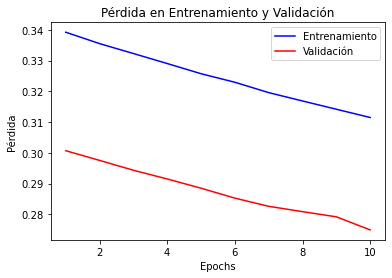

In [11]:
import matplotlib.pyplot as plt

ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()